<a href="https://colab.research.google.com/github/RubingLi123/foster_2023spring/blob/2023sp-master/Homeworks/HW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#If opening in colab run this cell
!git clone https://github.com/CTVisMe/DS4B_Sp24
%cd DS4B_Sp24/Homeworks/

Cloning into 'DS4B_Sp24'...
remote: Enumerating objects: 725, done.
remote: Counting objects: 100% (127/127), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 725 (delta 55), reused 126 (delta 55), pack-reused 598
Receiving objects: 100% (725/725), 132.06 MiB | 20.07 MiB/s, done.
Resolving deltas: 100% (318/318), done.
Updating files: 100% (126/126), done.
/content/DS4B_Sp24/Homeworks


# REMEMBER TO SAVE THIS NOTEBOOK TO YOUR OWN GOOGLE DRIVE!

##Please submit homework to Brightspace in the form of a file named **`lastname_firstname.ipynb`** AND as a pdf in the form of **`lastname_firstname.pdf`**



# Homework 1: Graduate admissions case study

You've been hired by Hudson University as a data analyst for the Graduate Admissions Department. Since the admission process is long and tedious, it often results in a bottleneck for other subsequent tasks, such as planning the necessary resources to accommodate the admitted students (e.g. housing, classes, etc). You have been asked to build a model to predict which students will be admitted using the following historical data:

1. Serial No. (serves as unique identifier)
2. GRE Scores (out of 340)
3. TOEFL Scores (out of 120)
4. University Rating (out of 5).
5. Statement of Purpose Strength (out of 5)
6. Letter of Recommendation Strength (out of 5)
7. Undergraduate GPA (out of 10)
8. Research Experience (either 0 or 1)
9. Chance of Admit (ranging from 0 to 1)

The chances of admit for the applicants in your data were assessed by an expert. Given that this list of application attributes would be available early in the admission process for future applications (except for Chance of Admit), a model predicting chances of admit would allow planning tasks to start earlier.

For the following numbered items, **follow any directions and answer any questions**.  Optional parts carry no credit, but should be helpful for your learning.

In [2]:
# Some libraries you may need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Trick to display plots inline with the rest of your notebook.
%matplotlib inline

**1. Load the homework data into a pandas data frame. Print the number of rows and columns in the dataset.**

In [3]:
data_path = "./data/data-hw1.csv"
#YOUR CODE HERE
df = pd.read_csv(data_path)
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [4]:
# Print the number of rows and columns in the dataset
num_rows, num_cols = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 500
Number of columns: 9


**2. Rename the columns in the dataframe to manipulate the data more easily. This will make your life easier.  Show a few lines with the new column names.**

In [5]:
# Put your answer here.

# Here are some suggested column names: "ID", "GRE", "TOEFL", "Rating", "SOP", "LOR", "CGPA", "Research", "Admit"

df = df.rename(columns={'Serial No.': 'No', 'GRE Score':'GRE', 'TOEFL Score': 'TOEFL', 'University Rating': 'Rating', 'Chance of Admit': 'Admit'})
df

,No,GRE,TOEFL,Rating,SOP,LOR,CGPA,Research,Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [6]:
# Show a few lines with the new column names
df.head()

,No,GRE,TOEFL,Rating,SOP,LOR,CGPA,Research,Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


**3. Show descriptive statistics for all columns.**

In [7]:
#YOUR CODE HERE
df.describe()

,No,GRE,TOEFL,Rating,SOP,LOR,CGPA,Research,Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


**4. What is the distribution of the chances of admit? Plot a histogram of
this variable. Using arguments for plt.hist, play with the variables 'color', 'alpha', and 'edgecolor' to create a histogram with blue bars, and black outlines around the bars.  Draw a red vertical dashed line on the histogram at the median value.**

In [8]:
max(df['Admit'].value_counts())

23

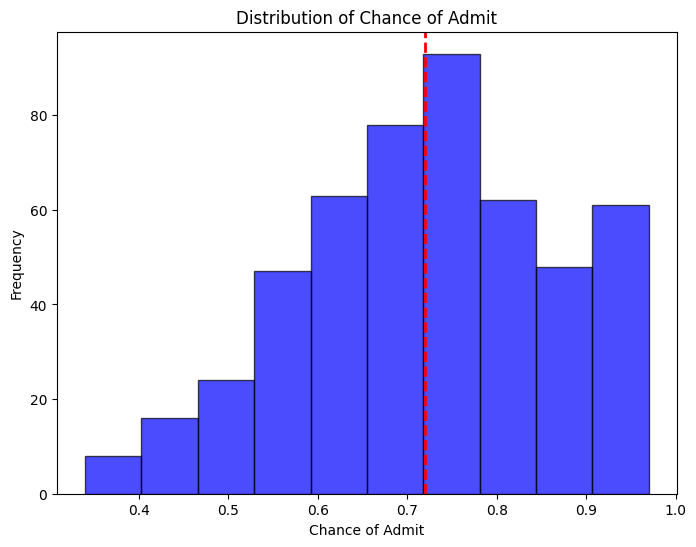

In [9]:
#YOUR CODE HERE

import matplotlib.pyplot as plt

# Plot histogram of chances of admit
plt.figure(figsize=(8, 6))
plt.hist(df['Admit'], color='blue', alpha=0.7, edgecolor='black')

# Add vertical dashed line at median value
median_value = df['Admit'].median()
plt.axvline(x=median_value, color='red', linestyle='--', linewidth=2)

# Add labels and title
plt.xlabel('Chance of Admit')
plt.ylabel('Frequency')
plt.title('Distribution of Chance of Admit')

# Show plot
plt.show()

**5. Chances of admit seem to vary quite a bit. How much of this depends on research experience? Print the average chance of admit against research. (this can be done using a groupby) and interpret the results.**

count    61.000000
mean      0.486365
std       0.365770
min       0.000000
25%       0.200000
50%       0.400000
75%       0.866667
max       1.000000
Name: Research, dtype: float64


<Axes: xlabel='Admit', ylabel='Research'>

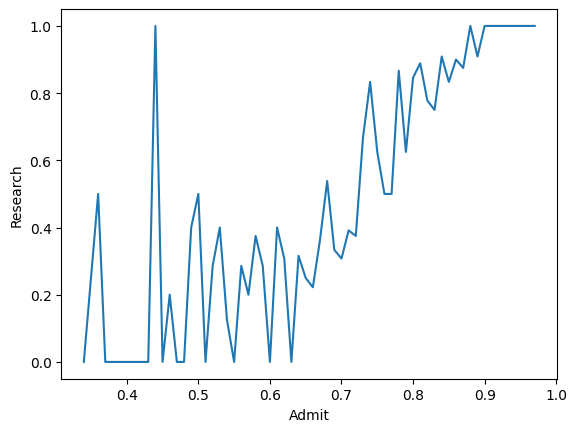

In [10]:
#YOUR CODE HERE
admit_research = df.groupby('Admit')['Research'].mean()
print(admit_research.describe())
admit_research.plot(ylabel='Research')

**Interpret the results:**

The graph illustrates a significant increase in admission chances, rising from 60% to 100%, as research experience increases. This indicates a strong correlation between research experience and admission likelihood.

**6. Does the distribution of chances of admit change with university rating? Plot a histogram of chances of admit for each university rating. Plot 5 histograms - with vertical line at the median for each histogram. Interpret what you learn from the plots.** (optional - plot all histograms with the same range on the X-axis to aid in comparisons)

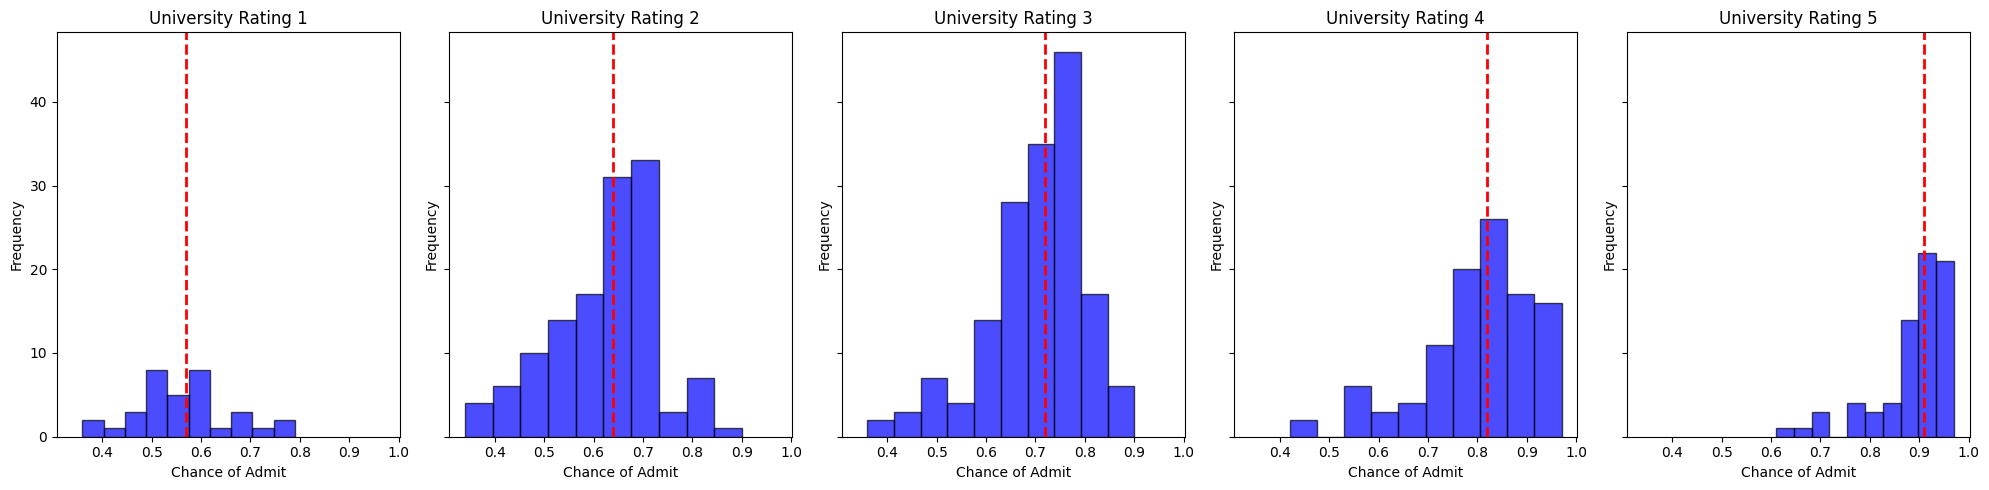

In [11]:
#YOUR CODE HERE

# Create subplots for each university rating
fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharex=True, sharey=True)

# Plot histograms for each university rating
for i, rating in enumerate(range(1, 6)):
    ax = axes[i]
    data_by_rating = df[df['Rating'] == rating]
    ax.hist(data_by_rating['Admit'], color='blue', alpha=0.7, edgecolor='black')

    # Add vertical dashed line at median value for each rating
    median_value = data_by_rating['Admit'].median()
    ax.axvline(x=median_value, color='red', linestyle='--', linewidth=2)

    # Add labels and title
    ax.set_xlabel('Chance of Admit')
    ax.set_ylabel('Frequency')
    ax.set_title(f'University Rating {rating}')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

**7. Another way to look at the relationship between two variables is through scatter plots. Plot a scatter plot between TOEFL Score and chance of admit.  Make sure to label the axes. How would you describe this relationship?**

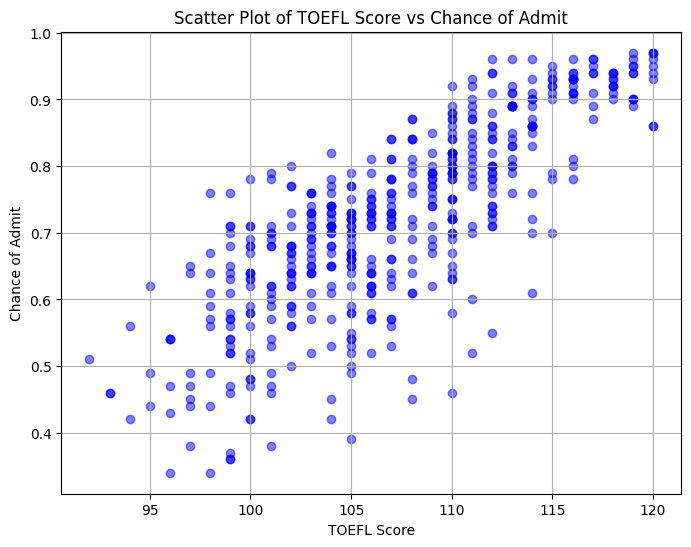

In [12]:
#YOUR CODE HERE

# Plot scatter plot between TOEFL Score and chance of admit
plt.figure(figsize=(8, 6))
plt.scatter(df['TOEFL'], df['Admit'], color='blue', alpha=0.5)

# Add labels and title
plt.xlabel('TOEFL Score')
plt.ylabel('Chance of Admit')
plt.title('Scatter Plot of TOEFL Score vs Chance of Admit')

# Show plot
plt.grid(True)
plt.show()

**How would you describe this relationship?**

The relationship between TOEFL scores and admissions appears to be linear based on the graph, suggesting that higher TOEFL scores have a significant impact on admission likelihood.

**8. Boxplots are also useful to look at the relationship between a categorical variable and a numeric variable. Plot a boxplot of chance of admit grouped by "University Rating". (check out the *seaborn* library)**

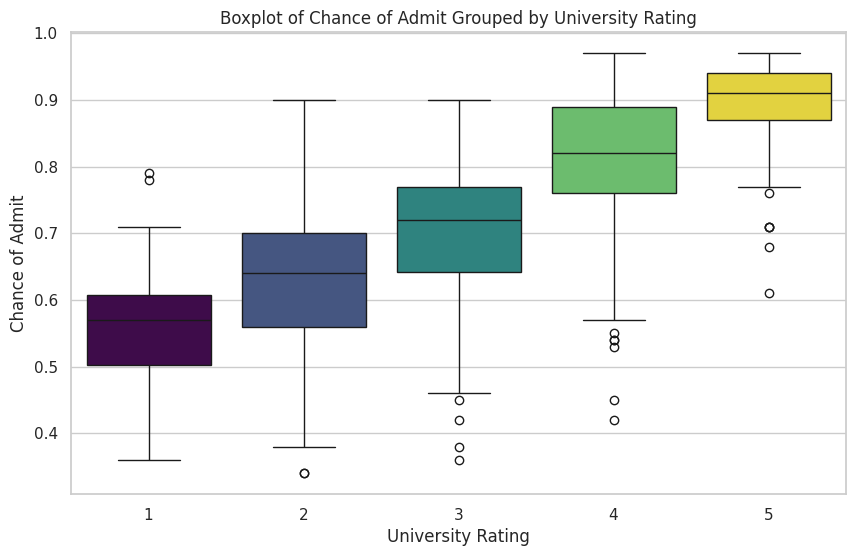

In [13]:
#YOUR CODE HERE

import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Create boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rating', y='Admit', data=df, hue='Rating', palette='viridis', dodge=False, legend=False)

# Add labels and title
plt.xlabel('University Rating')
plt.ylabel('Chance of Admit')
plt.title('Boxplot of Chance of Admit Grouped by University Rating')

# Show plot
plt.show()

**8b. The boxplots above show some outliers.  In particular the box for 'University Rating' = 5 has some cases with lower 'Chance of Admit'.  Can you identify which case (by serial number) has the lowest Chance of Admit but comes from a university with Rating = 5?**


In [14]:
#YOUR CODE HERE

# Filter the DataFrame for cases with University Rating = 5
rating_5_cases = df[df['Rating'] == 5]

# Find the case with the lowest Chance of Admit
lowest_chance = rating_5_cases[rating_5_cases['Admit'] == rating_5_cases['Admit'].min()]

# Print the serial number of the case
print("Serial Number of the case with the lowest Chance of Admit from a university with Rating = 5:", lowest_chance['No'].iloc[0])

Serial Number of the case with the lowest Chance of Admit from a university with Rating = 5: 111


**9. Drop the column for Serial Number. It is not useful for the following summarization and modelling tasks.**

In [15]:
#YOUR CODE HERE

# Drop the 'Serial No.' column
df.drop(columns=['No'], inplace=True)

# Verify the DataFrame after dropping the column
print(df.head())

   GRE  TOEFL  Rating  SOP  LOR  CGPA  Research  Admit
0  337    118       4  4.5  4.5  9.65         1   0.92
1  324    107       4  4.0  4.5  8.87         1   0.76
2  316    104       3  3.0  3.5  8.00         1   0.72
3  322    110       3  3.5  2.5  8.67         1   0.80
4  314    103       2  2.0  3.0  8.21         0   0.65


**10. Very often it is useful to quantify how strong is the relationship between different variables. For example, measures of correlation, such as Pearson's correlation coefficient, can show whether one numeric variable gives information on another numeric variable. Pandas allows us to compute the Pearson correlation coefficient between all pairs of columns in our dataframe . Display the correlations between all pairs of columns . Round values to three decimal places.**

In [16]:
#YOUR CODE HERE

# Compute the Pearson correlation coefficient between all pairs of columns
correlation_matrix = df.corr()

# Round values to three decimal places
correlation_matrix_rounded = correlation_matrix.round(3)

# Display the correlations between all pairs of columns
print(correlation_matrix_rounded)

            GRE  TOEFL  Rating    SOP    LOR   CGPA  Research  Admit
GRE       1.000  0.827   0.635  0.613  0.525  0.826     0.563  0.810
TOEFL     0.827  1.000   0.650  0.644  0.542  0.811     0.467  0.792
Rating    0.635  0.650   1.000  0.728  0.609  0.705     0.427  0.690
SOP       0.613  0.644   0.728  1.000  0.664  0.712     0.408  0.684
LOR       0.525  0.542   0.609  0.664  1.000  0.637     0.373  0.645
CGPA      0.826  0.811   0.705  0.712  0.637  1.000     0.501  0.882
Research  0.563  0.467   0.427  0.408  0.373  0.501     1.000  0.546
Admit     0.810  0.792   0.690  0.684  0.645  0.882     0.546  1.000


**11. Heatmaps are a tool for conveniently visualizing correlation data. Plot these correlations as a seaborn heatmap. Which pairs of variables are most closely correlated? Which variable gives the most information on chance of admit?** (See our `Module1_Data/Visualization` Module for hints)

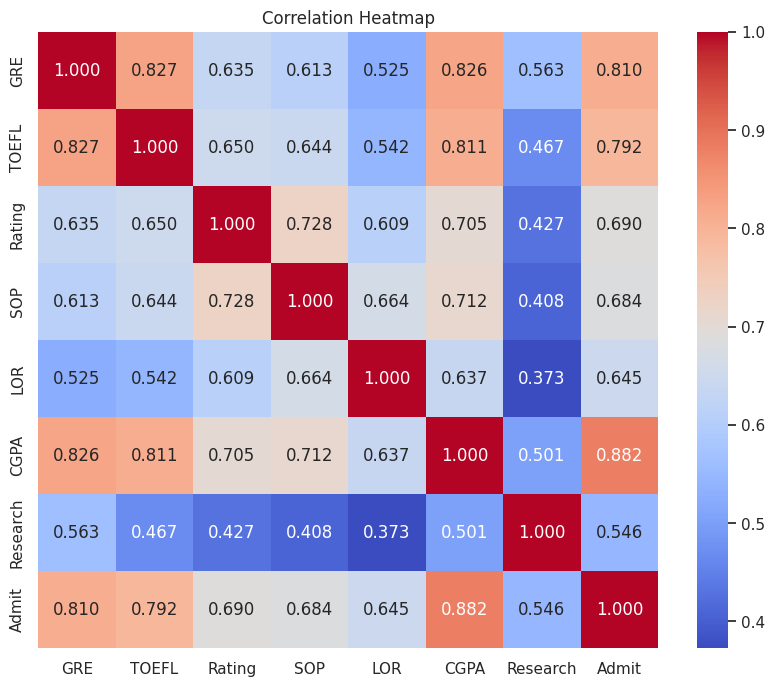

In [17]:
#YOUR CODE HERE

import seaborn as sns

# Create heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_rounded, annot=True, cmap='coolwarm', fmt=".3f")

# Add title
plt.title('Correlation Heatmap')

# Show plot
plt.show()

**Which variable gives the most information on chance of admit?**

The correlation heatmap indicates a strong relationship between CGPA and Admit, suggesting that CGPA provides significant insight into the likelihood of admission.

**12. Build a linear model to predict the chance of admit using the application info available. Generate predictions and compare predicted quantity to the actual value in a scatter plot. Print the $R^2$ value - which measures the effectiveness of the linear model, and the RMSE for your predictions (dont forget to round!)**  We will be covering predictive modeling in upcoming lectures, so having tried it first will give you better context for the material.  You can re-use the code in the section "A Taste of Whats to Come: Predictive Modeling" at the end of the `Managing_Data.ipynb` notebook from `Module1_Data`.

R^2 value: 0.819
RMSE: 0.061


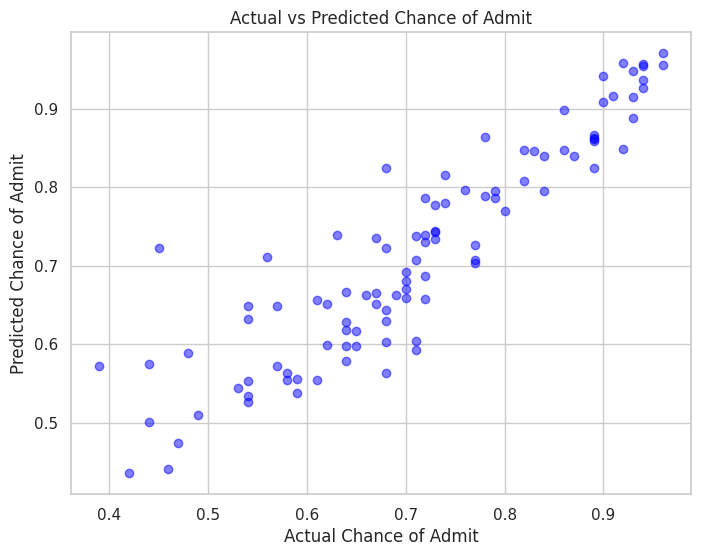

In [18]:
#YOUR CODE HERE

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Split data into features (X) and target variable (y)
X = df.drop(columns=['Admit'])
y = df['Admit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Generate predictions on the testing data
y_pred = model.predict(X_test)

# Calculate R^2 value
r2_value = r2_score(y_test, y_pred)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print R^2 value and RMSE
print("R^2 value:", round(r2_value, 3))
print("RMSE:", round(rmse, 3))

# Create scatter plot comparing predicted quantity to actual value
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel('Actual Chance of Admit')
plt.ylabel('Predicted Chance of Admit')
plt.title('Actual vs Predicted Chance of Admit')
plt.grid(True)
plt.show()

**13. Describe how the admissions team might take action to use the results of this model to aid in the admissions process.  Specifically what actions could they take, and what might the impact be of an effective model.  Do you see any concerns with using this data for this purpose?**

=> Click to provide answer here


The admissions team could use the results of this model to aid in the admissions process by identifying applicants who are more likely to be admitted based on their application information. They could prioritize reviewing applications with higher predicted chances of admission, potentially speeding up the decision-making process. An effective model could lead to more efficient resource allocation, such as better planning for housing and classes to accommodate admitted students. Additionally, it could help the admissions team identify factors that are most influential in predicting the chance of admission, allowing them to focus on strengthening those aspects in future applicants. However, there are concerns with using this data for this purpose, such as potential biases in the data or the model itself. For example, if the historical data used to train the model is biased towards certain demographics or backgrounds, the model's predictions may perpetuate or even exacerbate existing inequalities in the admissions process. It's essential for the admissions team to continuously monitor and evaluate the model's performance and consider these concerns when making decisions based on its predictions.


**14.(Optional - Extra Credit) We did the previous exercise without using a train/test split of the data.  This is probably the last time we will do this!  We'll get there.  But if you know how to do this, or want to practice in advance, perform the same LinearRegression with an 80/20 train/test split.  Train the regression, and make predictions on the test data.  Measure and report the RMSE.**

RMSE: 0.061


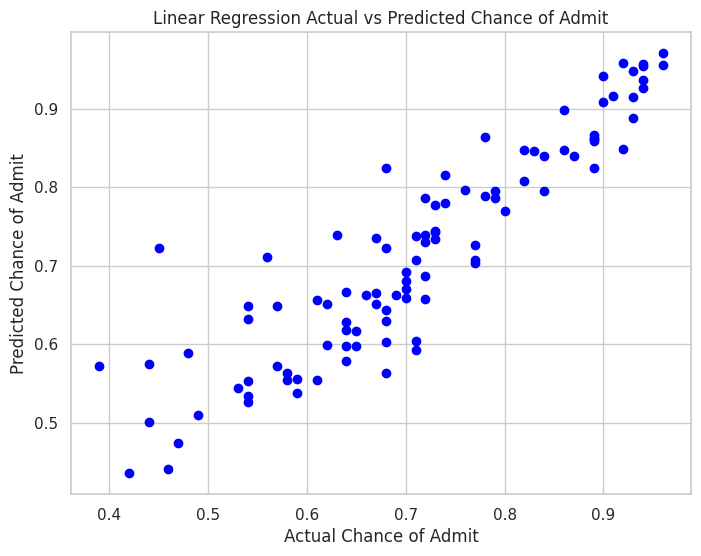

In [19]:
#YOUR CODE HERE

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Split data into features (X) and target variable (y)
X = df.drop(columns=['Admit'])
y = df['Admit']

# Split the data into training and testing sets with an 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Generate predictions on the testing data
y_pred = model.predict(X_test)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print RMSE
print("RMSE:", round(rmse, 3))

# Create scatter plot comparing predicted quantity to actual value
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Chance of Admit')
plt.ylabel('Predicted Chance of Admit')
plt.title('Linear Regression Actual vs Predicted Chance of Admit')
plt.show()

**15. (Optional - Extra Credit) There are many different types of predictive models, each
with their own plusses and minuses. For this task, repeat your modeling performed in last question, but using a sklearn.ensemble.RandomForestRegressor. How does the scatter plot and RMSE compare with the prior results?**

RMSE for Random Forest Regressor: 0.066


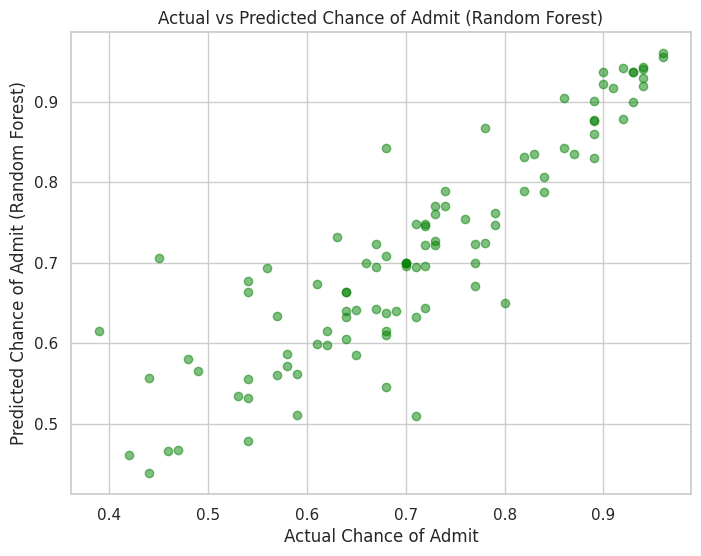

In [20]:
from sklearn.ensemble import RandomForestRegressor

#YOUR CODE HERE

from sklearn.ensemble import RandomForestRegressor

# Instantiate the Random Forest Regressor model
forest_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
forest_model.fit(X_train, y_train)

# Generate predictions on the testing data
forest_y_pred = forest_model.predict(X_test)

# Calculate RMSE for Random Forest Regressor
forest_rmse = np.sqrt(mean_squared_error(y_test, forest_y_pred))

# Print RMSE for Random Forest Regressor
print("RMSE for Random Forest Regressor:", round(forest_rmse, 3))

# Create scatter plot comparing predicted quantity to actual value for Random Forest Regressor
plt.figure(figsize=(8, 6))
plt.scatter(y_test, forest_y_pred, color='green', alpha=0.5)
plt.xlabel('Actual Chance of Admit')
plt.ylabel('Predicted Chance of Admit (Random Forest)')
plt.title('Actual vs Predicted Chance of Admit (Random Forest)')
plt.grid(True)
plt.show()

**How does the scatter plot and RMSE compare with the prior results?**

**Linear Regression (previous model)**:
RMSE: 0.061

**Random Forest Regressor:**
RMSE: 0.066

**Comparison of models:**
The RMSE reveals a slight disparity between the Random Forest Regressor (0.066) and the Linear Regression model (0.061), suggesting that, on average, the Random Forest model's predictions exhibit slightly elevated errors in comparison to those of the Linear Regression model. Nonetheless, due to this marginal difference, it appears that both models are proficient in addressing the specified problem.

##Please submit homework to Brightspace in the form of a file named `lastname_firstname.ipynb`


